In [1]:
import pandas as pd

In [2]:
goal_db=pd.read_csv("../input/messi-news-dataset/messi_news_dataset.csv") 
goal_db.head()

,title,author,date,content
0,"With Messi moving to France, the Bundesliga ne...",Ronan Murphy,"Aug 12, 2021","After a quiet transfer market, Germany's top f..."
1,"No Messi, no hope? How Barcelona will line up ...",Rik Sharma,"Aug 12, 2021",The Argentine has been carrying the Catalan cl...
2,Messi to PSG: A transfer 10 years in the makin...,Robin Bairner,"Aug 14, 2021",Seeing Lionel Messi play in a club shirt that ...
3,NXGN Revisited: What happened to Barcelona's '...,Emma Smith,"Aug 25, 2021",The forward broke records during his early yea...
4,"Don't cry for me, Barcelona! PSG providing Mes...",Daniel Edwards,"Aug 11, 2021",The Argentine attacker shed tears after his sh...


In [3]:
goal_db[['month_day','year']] = goal_db.date.str.split(",",expand=True)
goal_db[['month','day']] = goal_db.month_day.str.split(" ",expand=True)
goal_db = goal_db.drop(columns=['month_day'])
goal_db.head()

,title,author,date,content,year,month,day
0,"With Messi moving to France, the Bundesliga ne...",Ronan Murphy,"Aug 12, 2021","After a quiet transfer market, Germany's top f...",2021,Aug,12
1,"No Messi, no hope? How Barcelona will line up ...",Rik Sharma,"Aug 12, 2021",The Argentine has been carrying the Catalan cl...,2021,Aug,12
2,Messi to PSG: A transfer 10 years in the makin...,Robin Bairner,"Aug 14, 2021",Seeing Lionel Messi play in a club shirt that ...,2021,Aug,14
3,NXGN Revisited: What happened to Barcelona's '...,Emma Smith,"Aug 25, 2021",The forward broke records during his early yea...,2021,Aug,25
4,"Don't cry for me, Barcelona! PSG providing Mes...",Daniel Edwards,"Aug 11, 2021",The Argentine attacker shed tears after his sh...,2021,Aug,11


In [4]:
goal_db['COUNTER'] =1
group_data = (goal_db.groupby(['year','month'])['COUNTER'].sum()).reset_index(name='total_news')
print(group_data.sort_values(by=['total_news'],ascending=False))


     year month  total_news
13   2020   Aug          14
22   2020   Oct          13
30   2021   Mar          11
25   2021   Aug          11
7    2019   Mar          10
9    2019   Nov          10
0    2019   Apr           9
2    2019   Dec           9
28   2021   Jul           9
14   2020   Dec           9
5    2019   Jul           8
23   2020   Sep           8
18   2020   Jun           8
6    2019   Jun           7
26   2021   Feb           7
17   2020   Jul           6
31   2021   May           6
12   2020   Apr           6
15   2020   Feb           5
20   2020   May           5
21   2020   Nov           5
11   2019   Sep           5
24   2021   Apr           5
10   2019   Oct           5
29   2021   Jun           5
16   2020   Jan           5
1    2019   Aug           4
19   2020   Mar           4
8    2019   May           4
27   2021   Jan           4
3    2019   Feb           3
4    2019   Jan           2


<AxesSubplot:xlabel='month', ylabel='total_news'>

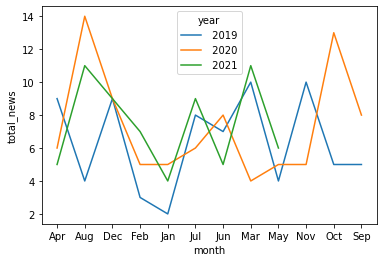

In [5]:
import seaborn as sns
sns.lineplot(data=group_data,x='month', y='total_news', hue='year')

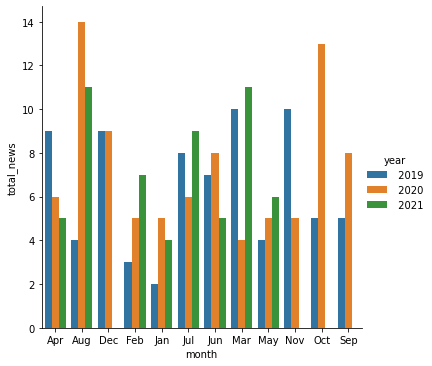

In [6]:
sns.catplot(data=group_data, kind="bar",x='month', y='total_news', hue='year')